<a href="https://colab.research.google.com/github/EdVKu/Econophysics_Projects/blob/main/Ej8_ARCH_GARCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install arch

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arch
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:

def rendimientos(A):
  h = [(A[i+1]-A[i])/A[i] for i in range(len(A)-1)]
  return pd.DataFrame(h)
def rendLog(A):
   h = [np.log(A[i+1]/A[i]) for i in range(len(A)-1)]
   return pd.DataFrame(h)

In [ ]:
path = '/content/drive/MyDrive/Classroom/TSFMT-II(2024-1) Física/ParisIndex-2016-2023.csv'
paris = pd.read_csv(path, index_col = 0)
paris = paris.to_numpy()

In [ ]:
rends = rendimientos(paris[0,1:])
rendslog = rendLog(paris[0,1:])
prop = int(len(rends)*0.9)

In [ ]:
p2 = rends**2
p2b = rendslog**2

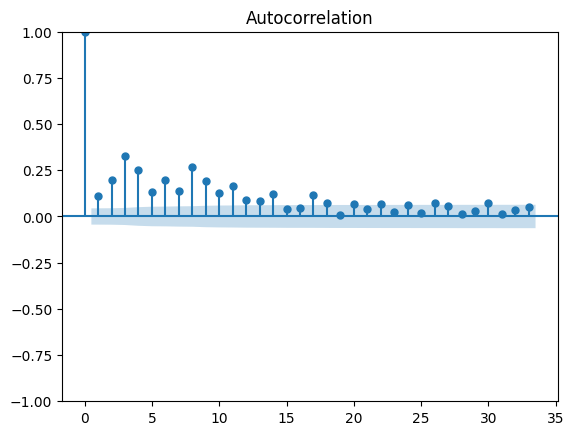

In [ ]:
plot_acf(p2)
#Cuenta el número de puntos fuera del intervalo de confianza antes de entrar a este,
#en ACF, eso es q.
#Para p, se hace lo mismo pero para PACF
q = 14

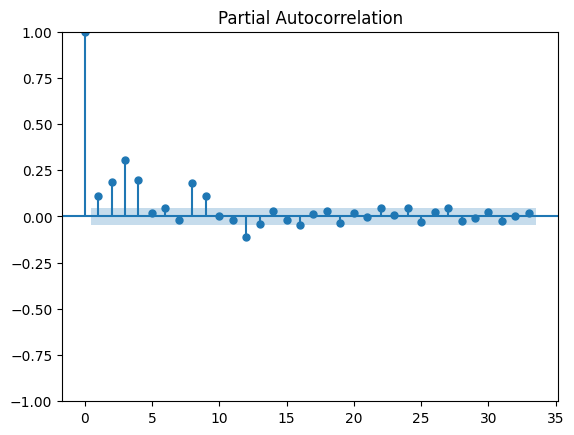

In [ ]:
plot_pacf(p2)
p = 4

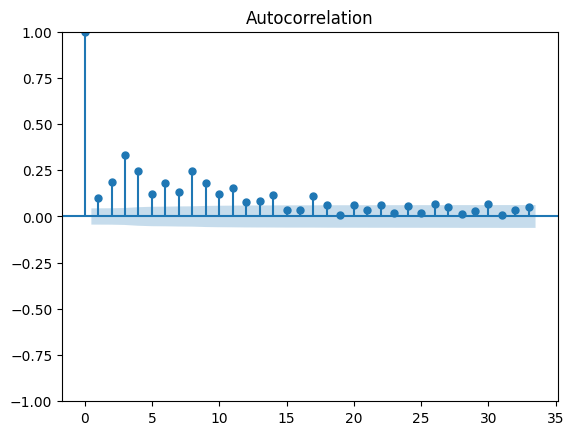

In [ ]:
plot_acf(p2b)
q2 =15

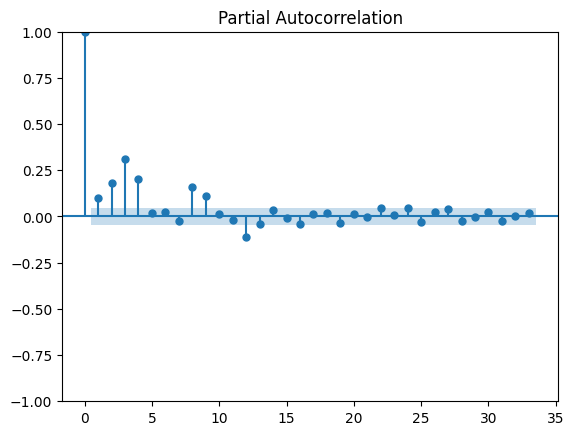

In [ ]:
plot_pacf(p2b)
p2 = p

In [ ]:
train1 = rends[:prop]
test1 = rends[prop:]
train2 = rendslog[:prop]
test2 = rendslog[prop:]

In [ ]:
model = arch.arch_model(rends[0], vol='GARCH', p=4, q=14)
results = model.fit()
model2 = arch.arch_model(rendslog[0], vol='GARCH', p=4, q=15)
results2 = model2.fit()

Iteration:      1,   Func. Count:     22,   Neg. LLF: 3.23993668973629e+20
Iteration:      2,   Func. Count:     50,   Neg. LLF: -6269.922823409121
Optimization terminated successfully    (Exit mode 0)
            Current function value: -6269.922830615762
            Iterations: 6
            Function evaluations: 50
            Gradient evaluations: 2
Iteration:      1,   Func. Count:     23,   Neg. LLF: 3.9782391284762463e+20
Iteration:      2,   Func. Count:     53,   Neg. LLF: 8447278399.804588
Optimization terminated successfully    (Exit mode 0)
            Current function value: -6263.651154543563
            Iterations: 2
            Function evaluations: 63
            Gradient evaluations: 2


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001431. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001446. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
len(results.conditional_volatility)

1984

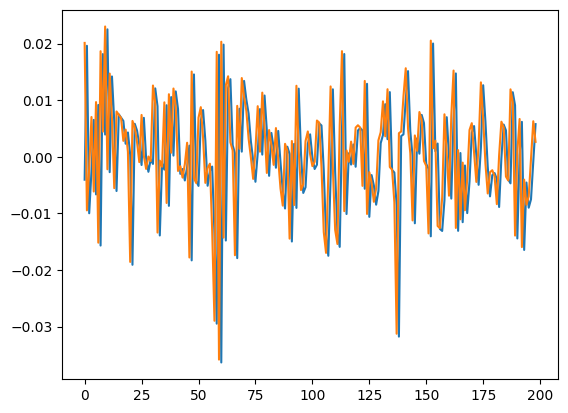

In [ ]:
plt.plot(range(len(test1)),results.resid[-200:-1])
plt.plot(range(len(test1)),test1)

Notamos que, para los últimos 199 valores de los resultados de GARCH, se obtiene una coincidencia perfecta con los datos de prueba. A continuación se presentan las gráficas de línea temporal, ACF y PACF de los resultados:

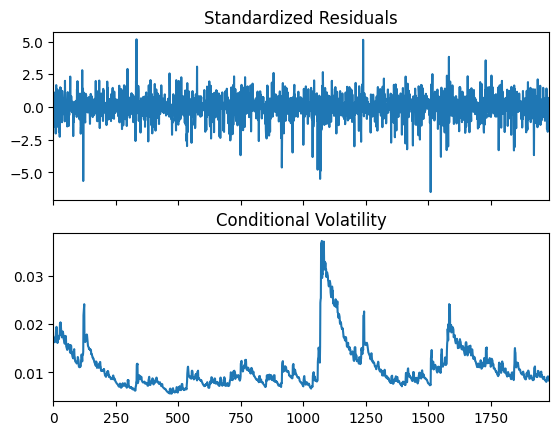

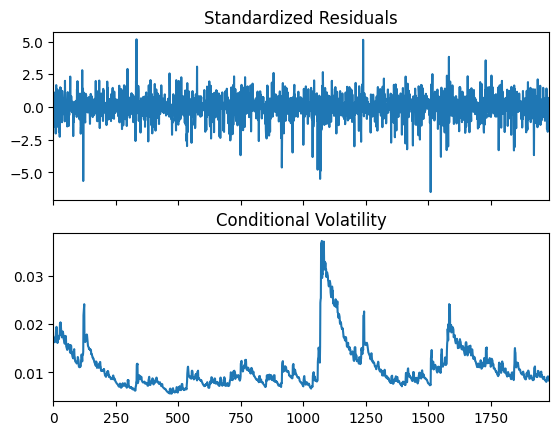

In [ ]:
results.plot()

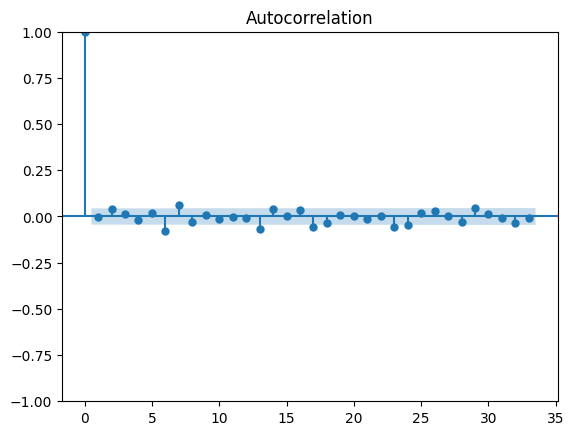

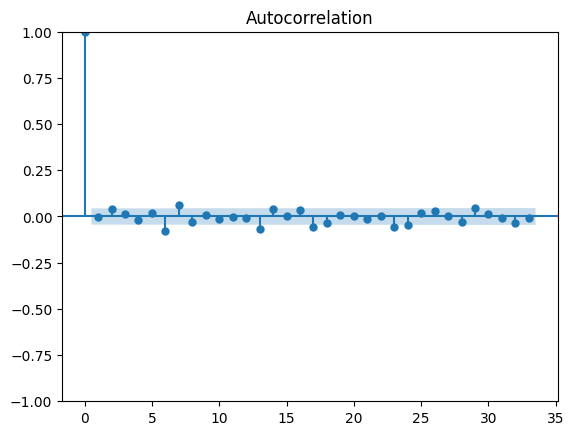

In [ ]:
plot_acf(rends)

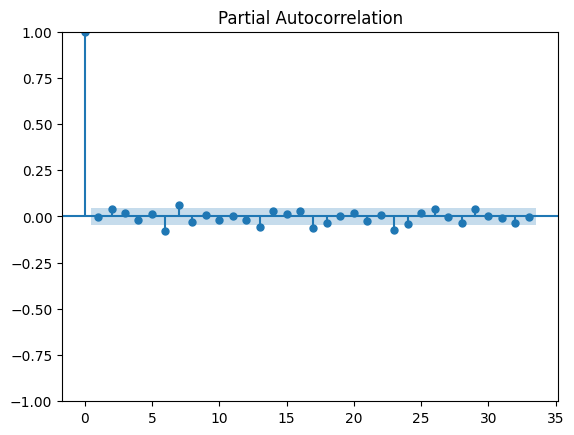

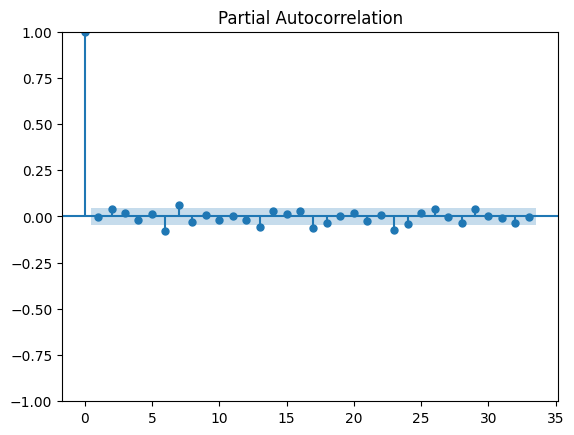

In [ ]:
plot_pacf(rends)